# Problem Sheet 2

## 2.1

Use Lagrange to interpolate:

$$ P(x) = \sum_{i=0}^nf_il_i(x) $$

$$ l_i(x) = \prod_{j=0,j\neq i}^n \frac{x - x_j}{x_i - x_j} $$

Or solve LSEQ:

$$ I : 1 = c $$
$$ II :e = a + b + c$$
$$ III :e^2 = 4a + 2b + c $$

Using np.polyfit():

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [11]:
x = np.array([0, 1 ,2])
f = np.array([1, math.e, math.e**2])
quadratic_interpolation_coeffs = np.polyfit(x, f, 2)
print(quadratic_interpolation_coeffs)

[1.47624622 0.24203561 1.        ]


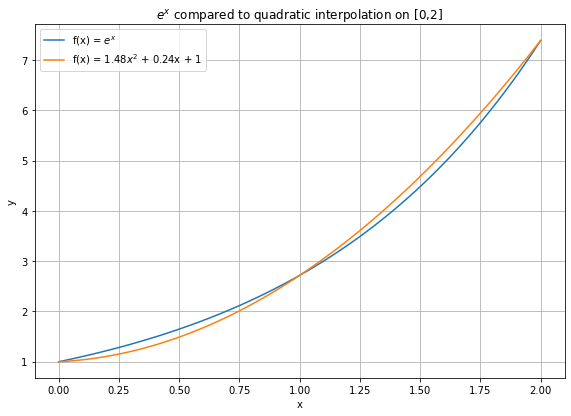

Error at x=1.2:  0.09612036445581218


In [17]:
x = np.linspace(0,2,100)
y1 = math.e**x
y2 = np.polyval(quadratic_interpolation_coeffs, x)

fig, ax = plt.subplots()
ax.plot(x,y1, label='f(x) = $e^x$')
ax.plot(x,y2, label='f(x) = 1.48$x^2$ + 0.24x + 1')
fig.set_size_inches(9.5, 6.5)
ax.set(xlabel='x', ylabel='y', title='$e^x$ compared to quadratic interpolation on [0,2]')
plt.legend()
plt.grid()
plt.show()
print('Error at x=1.2:  ' + str(abs(math.e**1.2 - np.polyval(quadratic_interpolation_coeffs, 1.2))))

Estimate for pointwise interpolation error on x $\in$ \[0,2\]:

$$f(x) - p(x) = \omega_{n+1}(x) \frac{f^{n+1}(\xi)}{(n+1)!}$$

$$ \omega_{n+1}(x) = \prod_{j=0}^n(x-x_i) $$

In our case:

$$ | f(x) - p(x) | \leq |\omega_{3}(x) |\frac{|f'''(2)|}{6}$$

$$ | f(x) - p(x) | \leq \frac{e^2}{6} |x(x-1)(x-2)|$$

The Maximum Error Estimate thus is found by computing the maximum of the polynomial $\omega_3$ :



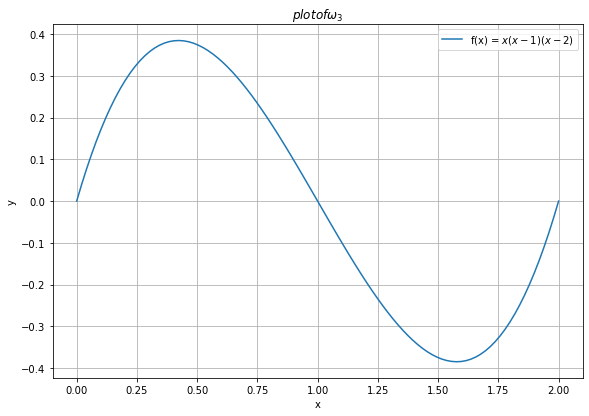

In [22]:
x = np.linspace(0,2,100)
y1 = x*(x-1)*(x-2)

fig, ax = plt.subplots()
ax.plot(x,y1, label='f(x) = $x(x-1)(x-2)$')
fig.set_size_inches(9.5, 6.5)
ax.set(xlabel='x', ylabel='y', title='$plot of \omega_3$')
plt.legend()
plt.grid()
plt.show()

The extrema are within the interval (0,2) so we calculate the derivative:

$$ \omega_3(x) = x(x-1)(x-2)$$

$$ \omega:3'(x) = (x-1)(x-2)+x(x-2)+x(x-1) $$

$$ \omega:3'(x) = x^2-3x+2+x^2-2x+x^2-x $$

$$ \omega_3'(x) = 3x^2-6x+2 $$

$$ \omega_{1,2} = 1 \pm \sqrt{1 - \frac{2}{3}} $$

In [376]:
w_1 = 1 + 1/math.sqrt(3)
w_max = w_1*(w_1-1)*(w_1-2)
print('w(w_1):   ' + str(w_max))

w(w_1):   -0.38490017945975047


Our Estimate for the maximum error is thus:

$$||f(x) - p(x)||_{\infty[0,2]} \leq \frac{e^2}{6} |\omega_1| \approx 0.474 $$

## 2.2

We know that for each individual interval $[t_j,t_{j+1}]$  there holds:

$$ ||f-p||_{\infty,[t_j,t_{j+1}]} \leq (t_j-t_{j+1})^{n+1} \frac{||f^{n+1}||_{\infty,[t_j,t_{j+1}]}}{(n+1)!}$$

$$ ||f-p||_{\infty,[t_j,t_{j+1}]} \leq h^{n+1} \frac{||f^{n+1}||_{\infty,[t_j,t_{j+1}]}}{(n+1)!}$$

If we consider all sections, then:

$$ ||f-p||_{\infty,[a,b]} = \max_{j=0,N-1} ||f-p||_{\infty,[t_j,t_{j+1}]} \leq \max_{j=0,N-1} h^{n+1} \frac{||f^{n+1}||_{\infty,[t_j,t_{j+1}]}}{(n+1)!}$$

$$ ||f-p||_{\infty,[a,b]} \leq \frac{h^{n+1}}{(n+1)!} \max_{j=0,N-1}  ||f^{n+1}||_{\infty,[t_j,t_{j+1}]} $$

Which is equal to:

$$ ||f-p||_{\infty,[a,b]} \leq \frac{h^{n+1}}{(n+1)!} ||f^{n+1}||_{\infty,[a,b]} $$

## 2.3

### Aitken-Neville-Scheme 

We define the Neville Scheme as follows:

In [377]:
def Neville_Scheme(x, f, x_bar):
    Scheme = np.zeros((x.size, x.size))
    n = x.size - 1
    Scheme[:,0] = f
    for m in range(1,n+1):
        for j in range(0,n-m+1):
            Scheme[j][m] = ((x_bar - x[j])*Scheme[j+1][m-1] - (x_bar - x[j+m])*Scheme[j][m-1])/(x[j+m]-x[j])
    return Scheme

In [378]:
h = [2**-i for i in range(11)]
h = np.array(h)

In [379]:
import pandas as pd

def tan(x):
    return math.tan(x)
np_tan = np.vectorize(tan)

x_0 = math.pi/4
f = (np_tan(x_0 + h) - np_tan(x_0 - h))/(2*h)

Scheme = Neville_Scheme(h, f, 0)
df = pd.DataFrame(Scheme)
print(df.iloc[:,[0,1,2,3]])

           0         1         2         3
0  -2.185040  8.414671 -1.130751  2.578846
1   3.114815  1.255604  2.115146  1.988372
2   2.185210  1.900261  2.004218  1.999667
3   2.042735  1.978229  2.000236  1.999983
4   2.010482  1.994734  2.000014  1.999999
5   2.002608  1.998694  2.000001  2.000000
6   2.000651  1.999674  2.000000  2.000000
7   2.000163  1.999919  2.000000  2.000000
8   2.000041  1.999980  2.000000  0.000000
9   2.000010  1.999995  0.000000  0.000000
10  2.000003  0.000000  0.000000  0.000000


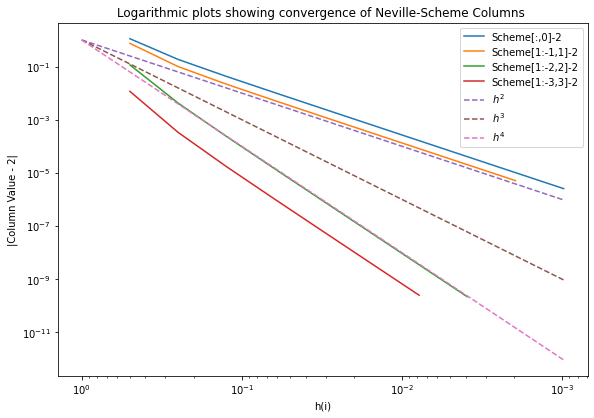

In [334]:
fig, ax = plt.subplots()
ax.loglog(h[1:],abs(Scheme[1:,0]-2), label='Scheme[:,0]-2')
ax.loglog(h[1:-1],abs(Scheme[1:-1,1]-2), label='Scheme[1:-1,1]-2')
ax.loglog(h[1:-2],abs(Scheme[1:-2,2]-2), label='Scheme[1:-2,2]-2')
ax.loglog(h[1:-3],abs(Scheme[1:-3,3]-2), label='Scheme[1:-3,3]-2')
ax.loglog(h[:],h[:]**2, label='$h^2$', linestyle='dashed')
ax.loglog(h[:],h[:]**3, label='$h^3$', linestyle='dashed')
ax.loglog(h[:],h[:]**4, label='$h^4$', linestyle='dashed')

fig.set_size_inches(9.5, 6.5)
ax.set(xlabel='h(i)', ylabel='|Column Value - 2|', title='Logarithmic plots showing convergence of Neville-Scheme Columns ')
ax.invert_xaxis()
plt.legend()

## 2.4

$$ S(N) := \sum^N_{n=1} \frac{1}{n} $$ 

$$ S(N) = ln(N) + a_0 + \frac{a_1}{N} + \frac{a_2}{N} + ... $$

In [380]:
import numpy as np
import math
import time

In [381]:
def S(N):
    return np.sum(1/np.arange(1,N+1))

In [382]:
a = np.array([[1,1/10,1/10**2],[1,1/10*2,1/10*4],[1,1/10**3,1/10**6]])
b = np.array([S(10) - math.log(10), S(100) - math.log(100), S(1000) - math.log(1000)])
x = np.linalg.solve(a,b)
x

array([ 0.57719942,  0.5164057 , -0.24568308])

In [383]:
print('Error for N = 10^6:   ' + str(abs(math.log(10**6)+x[0]+x[1]/10**6+x[2]/10**12 - S(10**6))))
print('Error for N = 10^8:   ' + str(abs(math.log(10**8)+x[0]+x[1]/10**8+x[2]/10**16 - S(10**8))))

Error for N = 10^6:   1.622694653313772e-05
Error for N = 10^8:   1.624318781878742e-05


In [384]:
start = time.time()
S(10**8)
stop = time.time()
runtime_S8 = stop - start

start = time.time()
S(10**9)
stop = time.time()
runtime_S9 = stop - start

print('Runtime for N=10^8:  ' + str(runtime_S8))
print('Runtime for N=10^9:  ' + str(runtime_S9))

Runtime for N=10^8:  0.6550107002258301
Runtime for N=10^9:  12.653985023498535


## 2.5

$$ \sum^\infty_{n=1} \frac{1}{n^2} = \frac{\pi^2}{6} $$ 

$$ S'(N) := \sum^N_{n=1} \frac{1}{n^2} = \frac{\pi^2}{6} $$ 

$$ S(N) =  a_0 + \frac{a_1}{N} + \frac{a_2}{N} + ... $$

In [385]:
import numpy as np
import math

In [386]:
def S(N):
    return np.sum(1/np.arange(1,N+1)**2)

a = np.array([[1,1/10**2,1/10**4],[1,1/10**3,1/10**6],[1,1/10**4,1/10**8]])
b = np.array([S(10), S(100), S(1000)])
x = np.linalg.solve(a,b)
x

array([ 1.6449339 , -9.99815408, 48.15371435])

In [387]:
print('Error for N = 10^6:   ' + str(abs(x[0] - math.pi**2/6)))

Error for N = 10^6:   1.6629560195546844e-07
